In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
f=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [3]:
f.variables.keys()

odict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [4]:
f.variables['e1t']

<class 'netCDF4._netCDF4.Variable'>
float64 e1t(t, y, x)
unlimited dimensions: t
current shape = (1, 898, 398)
filling off

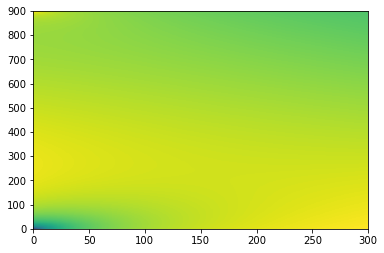

In [5]:
plt.pcolormesh(f.variables['e2t'][0,:,:300])

In [6]:
e1t=f.variables['e1t'][0,:,:]
e2t=f.variables['e2t'][0,:,:]
tmask=f.variables['tmask'][0,0,:,:]

In [7]:
np.min(np.ma.masked_where(tmask==0,e1t)),np.max(np.ma.masked_where(tmask==0,e1t))

(403.94780782127657, 519.0390300279804)

In [8]:
np.min(np.ma.masked_where(tmask==0,e2t)),np.max(np.ma.masked_where(tmask==0,e2t))

(187.21791672613713, 508.3360632808211)

In [9]:
np.min(np.ma.masked_where(tmask==0,e1t*e2t)),np.max(np.ma.masked_where(tmask==0,e1t*e2t))

(80964.97648693081, 248567.44913433644)

In [10]:
tmask=f.variables['tmask'][0,:,:,:]

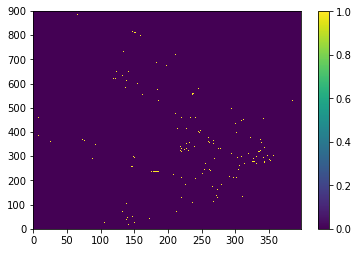

In [14]:
plt.pcolormesh(tmask[17,:,:]-tmask[18,:,:])
plt.colorbar()

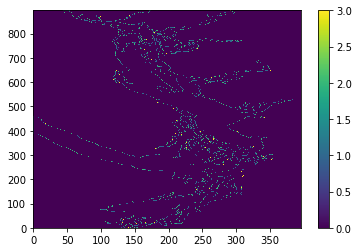

In [23]:
plt.pcolormesh((tmask[17,1:-1,1:-1]-tmask[17,2:,1:-1])*tmask[17,1:-1,1:-1]\
              +(tmask[17,1:-1,1:-1]-tmask[17,0:-2,1:-1])*tmask[17,1:-1,1:-1]\
              +(tmask[17,1:-1,1:-1]-tmask[17,1:-1,2:])*tmask[17,1:-1,1:-1]\
              +(tmask[17,1:-1,1:-1]-tmask[17,1:-1,0:-2])*tmask[17,1:-1,1:-1])
plt.colorbar()

(280, 320)

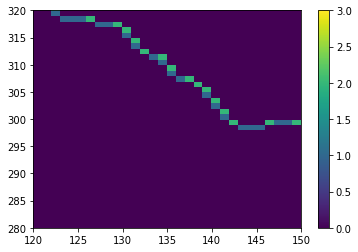

In [30]:
plt.pcolormesh((2*tmask[17,1:-1,1:-1]-tmask[17,2:,1:-1]-tmask[17,0:-2,1:-1])*tmask[17,1:-1,1:-1]\
              +(2*tmask[17,1:-1,1:-1]-tmask[17,1:-1,2:]-tmask[17,1:-1,0:-2])*tmask[17,1:-1,1:-1])
plt.colorbar()
plt.xlim(120,150)
plt.ylim(280,320)